# Meta-Heuríticas : Trabalho Prático 1 

- Aymê Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heuríticas para minimizar duas funções objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [96]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Funções Objetivo 

### 1.1 Representação da Solução

Vamos utilizar um vetor para representar as variáveis de decisão. Na função objetivo 1 ele terá tamanho dois pois temos duas variaveis de decisão poŕem na função objetivo 2 temos quatro variaveis de decisão sendo assim ele terá tamanho quatro.

### 1.2 Função Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [97]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

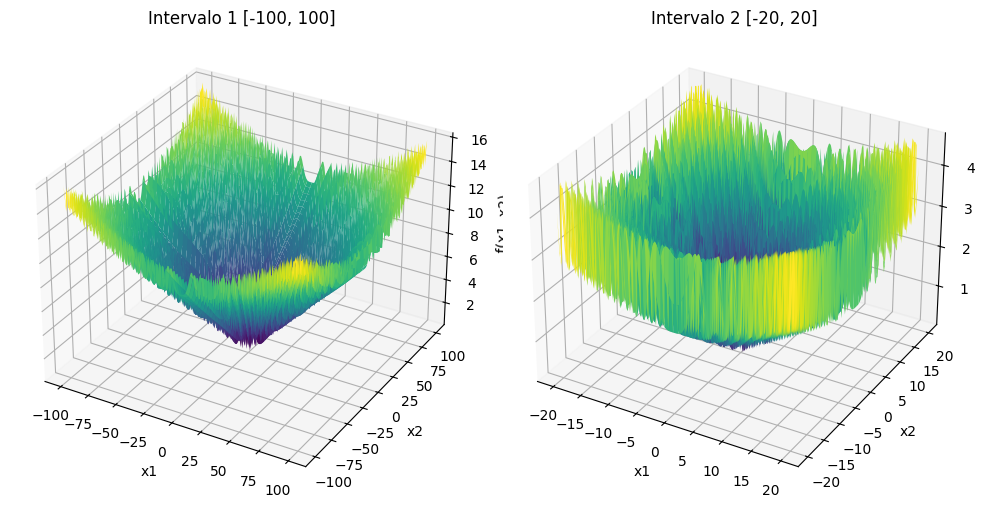

In [98]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Função Objetivo 2

1.3.1 Intervalos

a)−10 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 10

b)−2 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 2

In [99]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a função f(x) depende de quatro variáveis, foi necessário fixar x₃ e x₄ para permitir a visualização em 3D. Assim, foi possível analisar o comportamento da função variando apenas x₁ e x₂.

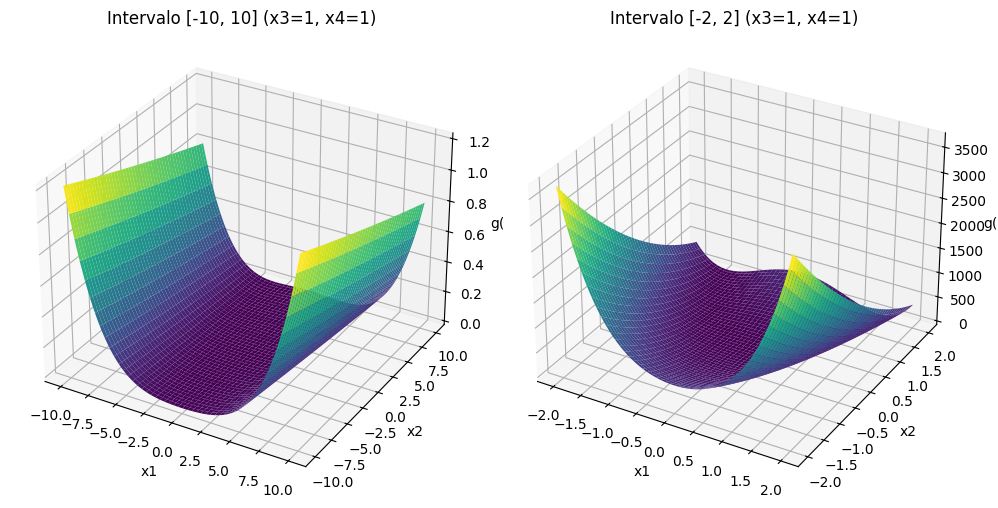

In [100]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as funções objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decisões precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) é uma metaheurística baseada na exploração sistemática de diferentes vizinhanças para encontrar a solução ótima de um problema. A principal motivação do VNS é evitar ficar preso em ótimos locais, expandindo a busca para outras regiões do espaço de soluções.

Ele se baseia na seguinte ideia:
- Se uma solução é um ótimo local em uma vizinhança, ela pode não ser em outra.
- Alternar entre diferentes vizinhanças ajuda a escapar de ótimos locais e encontrar melhores soluções.

VNS é eficiente, simples e versátil, sendo utilizado em problemas de otimização combinatória e contínua.

#### 2.1.1 Pseudocódigo do VNS Básico

Entrada: solução inicial `x`, número máximo de vizinhanças `k_max`, número máximo de iterações

1. x_best ← x

2. Para t = 1 até max_iter faça:

    3. k ← 1

    4. Enquanto k ≤ k_max faça:

        5.   Gerar x' na k-ésima vizinhança de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ← x''

        9.       k ← 1   // reinicia vizinhança

        10.  Senão:

        11.      k ← k + 1
        
12. Retornar x_best



Decisões importantes na implementação do VNS

- Solução Inicial
- Estrutura de Vizinhança
- Condições de Parada
- Estratégia de Busca Local
- Quantidade de vizinhanças (k_max)

### 2.1.2 Solução Inicial

Como a solução será representada por meio de um vetor, uma estratégia simples e muito utilizada na inicialização é a de gerar uma solução aleatória preenchendo as posições do vetor com valores que estejam dentro de um intervalo pré definido para cada variável.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing é um método de busca local que usa um procedimento de melhora iterativa, ou seja, a cada iteração ele tenta melhorar a solução corrente sendo portanto um algoritmo gulosa que não aceita piora. Seu algorimo para problemas de minimização é:

```
s --> solução candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturbação pequena na solução corrente para encontrar um nova solução
    se qualidade(r)<qualidade(s) então --> compara o valor da função objetivo na nova solução com o da solução corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se não melhora não faz nada
até condição de parada
retorne s
```

Analisando o algoritmo é preciso definir:
* Como obter solução Inicial
* Como pertubarr uma solução
* Condição de Parada

#### Solução Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solução canditada vai ser definida no VNS.

#### Perturbar Solução

O algoritmo Hill Climbing realiza pequenas perturbações na solução corrente, adicionando um valor aleatório, chamado de ruído, em cada variável de decisão. O desafio é controlar o tamanho da perturbação para que ela seja pequena o suficiente para não causar grandes variações, mas suficiente para explorar o espaço de soluções. Uma estratégia possível é limitar o ruído a um valor proporcional à solução atual, utilizando uma porcentagem dentro de um intervalo especificado.

Será utilizado um algoritmo que recebe o intervalo da porcentagem do ruído como parâmetro e escolhe aleatoriamente um valor dentro desse intervalo para cada variável de decisão. Isso permite que o método seja flexível e possa ser utilizado para perturbações de diferentes magnitudes, dependendo da configuração. O pseudocódigo do algoritmo é o seguinte:

```
min = valor mínimo desejado para cada elemento do vetor
max = valor máximo desejado para cada elemento do vetor

min_ruido = porcentagem mínima do ruído
max_ruido = porcentagem máxima do ruído

v = quantidade de variáveis de decisão
vetor[v] = solução a ser perturbada

for i de 1 até v faça --> para cada elemento do vetor de variáveis
    ruido = número aleatório [min_ruido, max_ruido]
    perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])

    se perturbacao < min[i] ou perturbacao > max[i] então
        enquanto perturbacao < min[i] ou perturbacao > max[i] faça
            ruido = número aleatório [min_ruido, max_ruido]
            perturbacao = vetor[i] + ruido * (número aleatório [min[i], max[i]] - vetor[i])
    
    adicionar perturbacao ao vetor

retornar vetor como array numpy

```

Para as pequenas pertubações vamos utilizar um ruido de 3% a 5%

#### Condição de parada

Existem várias estratégias que podem ser adotadas como condição de parada, como:
* certa quantidade de iterações realizadas
* certa quantidade de avaliações da função objetivo realizadas
* limite de tempo gasto
* certo número de iterações sme melhoria da solução atual

Na implementação do Hill Climbing o critério de parada será realizar 5 iterações sem melhoria da solução atual 

### 2.1.4 Gerar solução inicial aleatoria

In [101]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertubações 

In [102]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Checagem das restrições
        if perturbacao < min[i] or perturbacao > max[i]:
            # Caso a perturbação saia dos limites, tentamos gerar outra perturbação
            # ou ajustamos para dentro dos limites
            while perturbacao < min[i] or perturbacao > max[i]:
                ruido = random.uniform(min_ruido, max_ruido)
                perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Adiciona a perturbação à nova solução
        nova_solucao.append(perturbacao)
    
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [103]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao, max_iter=100):
    min_ruido = 0.05  # pode até aumentar esse ruído
    max_ruido = 0.1
    semMudanca = 0
    iter_count = 0

    while semMudanca < 5 and iter_count < max_iter:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao):
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
        
        iter_count += 1

    return solucao


### 2.1.7 VNS

In [104]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)

    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iter_total = 0

    while iter_total < max_iter:
        k = 1
        while k <= k_max:
            # Perturbação: nova solução na vizinhança k
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = np.clip(nova_solucao, min, max)
            
            # Busca local (hill climbing)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                # Aceita e reinicia vizinhança
                melhor_solucao = nova_solucao
                melhor_valor = valor_nova_solucao
                solucao_corrente = nova_solucao
                k = 1
            else:
                # Não melhorou: avança para próxima vizinhança
                k += 1

        iter_total += 1

    return melhor_solucao



#### Função Auxiliar Para Plotar um Gráfico com o Valor Final da Função Objetivo em cada Iteração

In [105]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Índice do melhor valor (mínimo)

    # Plotar a curva dos valores da função objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')

    for i in range(len(valores[target])):
        # Ponto atual
        y = valores[target][i]

        # Coleta os valores das variáveis (x1, x2, x3, ..., xn)
        texto_variaveis = '\n'.join([f'{var} = {valores[var][i]:.4f}' for var in valores if var != target])

        if i == min_index:
            # Destaca o melhor valor
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, y, texto_variaveis, fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Pontos normais
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=8, ha='center', va='center', color='black')

    # Configurações visuais
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execuções')
    plt.ylabel('Valor da função objetivo')
    plt.title(f'Valor Final da Função Objetivo em cada Execução do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [106]:
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de variáveis de decisão
for i in range(30):
    # Aqui você pode definir dinamicamente a quantidade de variáveis de decisão
    qtdVariaveisDecisao = 2
    
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1a['x1'].append(solucao[0])  
    vns_1a['x2'].append(solucao[1]) 
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  
    

print(vns_1a)


{'x1': [np.float64(-0.05980347074020842), np.float64(0.006720995805257424), np.float64(0.017018654099755524), np.float64(0.04617900827060972), np.float64(0.006889612685758939), np.float64(-0.01193753868941183), np.float64(-0.9958780262186536), np.float64(-0.02827854248008177), np.float64(-0.029431094565297133), np.float64(0.0116377775096983), np.float64(-0.006641151901553233), np.float64(-0.008813069435310683), np.float64(-0.04062549470820109), np.float64(0.001680273521784903), np.float64(-0.8066919363967135), np.float64(-0.002465732160479961), np.float64(-0.10038743539011552), np.float64(-0.0338946123507744), np.float64(-0.3530406471086769), np.float64(0.010491460172031841), np.float64(0.10639056404267325), np.float64(0.040002779227036545), np.float64(0.0420102310057715), np.float64(-0.04715944025010743), np.float64(-0.060939513188916994), np.float64(-0.04904328807547187), np.float64(-0.0056607280245525304), np.float64(0.00015102266288424815), np.float64(0.024797083437937184), np.floa

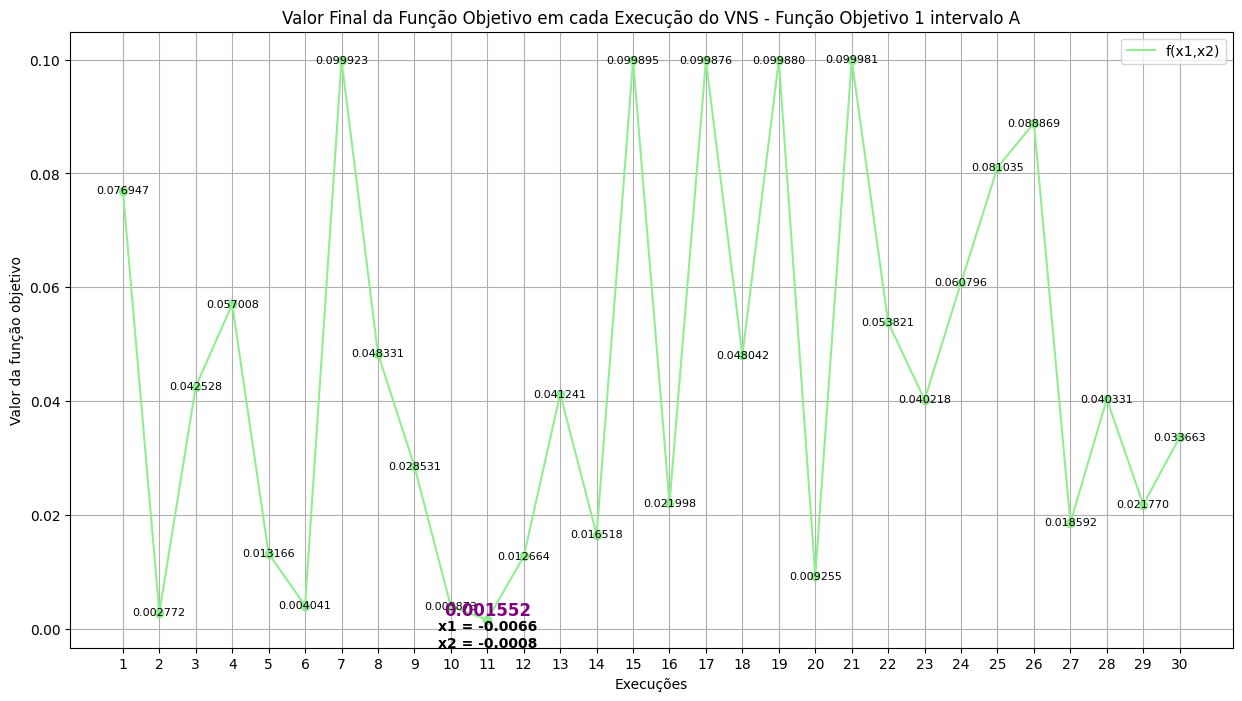

In [107]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo A')

#### Intervalo 1B

In [108]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de variáveis de decisão
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da função objetivo
    

print(vns_1b)

{'x1': [np.float64(-0.012592626158311526), np.float64(0.023390096472112265), np.float64(-0.00944843478128543), np.float64(0.016981844774348498), np.float64(0.005588618912083593), np.float64(0.030112009938988438), np.float64(0.0012656849651595525), np.float64(0.0020965475070821096), np.float64(0.011045397729134265), np.float64(-0.002593211000870621), np.float64(0.001227221603541634), np.float64(-0.01978408762105499), np.float64(0.025066762072402993), np.float64(0.002975254471315969), np.float64(-0.013532439231982607), np.float64(-0.015082485681986113), np.float64(-0.03064593158641965), np.float64(0.014994388165881889), np.float64(-0.031660870493340654), np.float64(0.011666931947379555), np.float64(-0.007097549993806018), np.float64(0.014645710382271027), np.float64(0.005931937485876282), np.float64(-0.007666675275724871), np.float64(-0.010549805053484906), np.float64(0.0082018007895448), np.float64(-0.012476245388925472), np.float64(-0.03963016698284483), np.float64(-0.00058598626104655

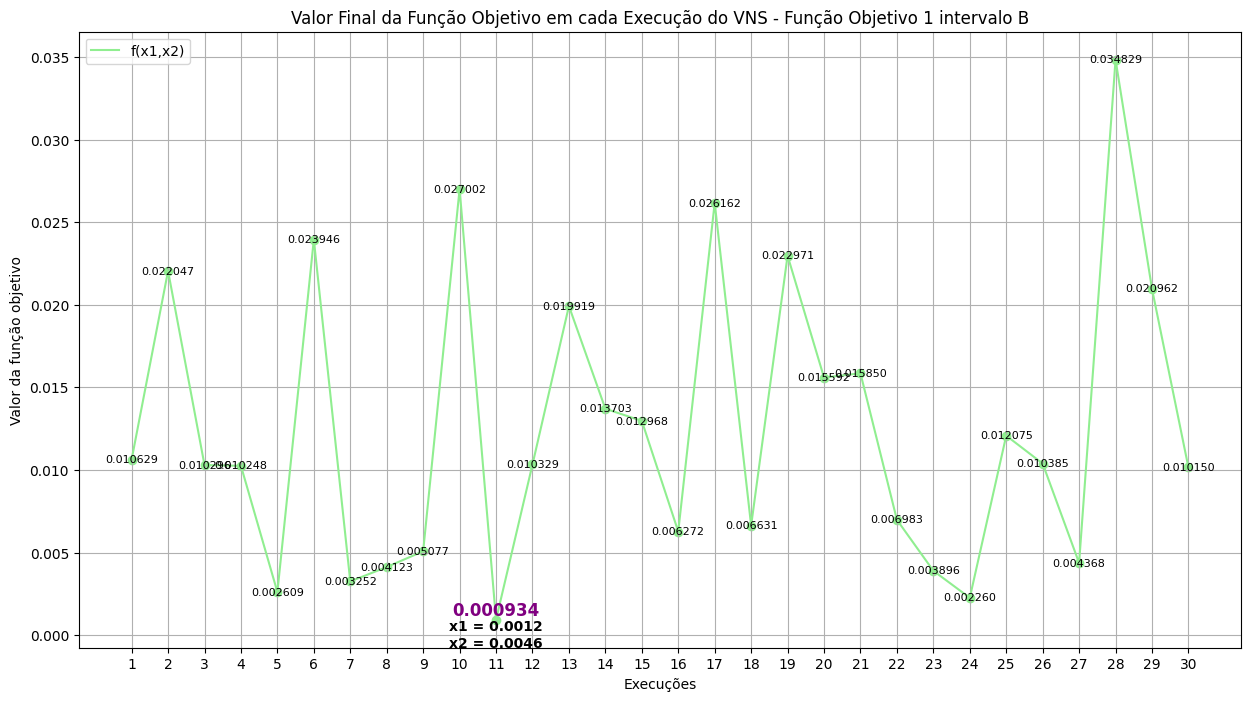

In [109]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo B')

#### Intervalo 2A

In [110]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de variáveis de decisão definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2a)


{'x1': [np.float64(0.7044375836224906), np.float64(1.3156788906022), np.float64(1.149904154102419), np.float64(1.1772996141989591), np.float64(1.1906279343866586), np.float64(1.081864184546621), np.float64(0.9386541892047708), np.float64(0.9480158599044515), np.float64(1.029987148844441), np.float64(0.8368618717702284), np.float64(1.0355905689010867), np.float64(1.1972441252480832), np.float64(1.117566447232992), np.float64(1.3759206040736942), np.float64(1.4180404614835604), np.float64(0.8315465762686903), np.float64(1.0671341433898633), np.float64(0.25446308754061664), np.float64(0.9667100445845231), np.float64(0.9681808249183868), np.float64(0.9228427284441791), np.float64(0.7576596922068315), np.float64(0.7464317733107461), np.float64(0.9981426167396875), np.float64(0.30386516595724855), np.float64(0.7519867274377987), np.float64(0.9182082468602386), np.float64(0.364072660319822), np.float64(1.0723884881897843), np.float64(1.3786795995425962)], 'x2': [np.float64(0.5584164813998325)

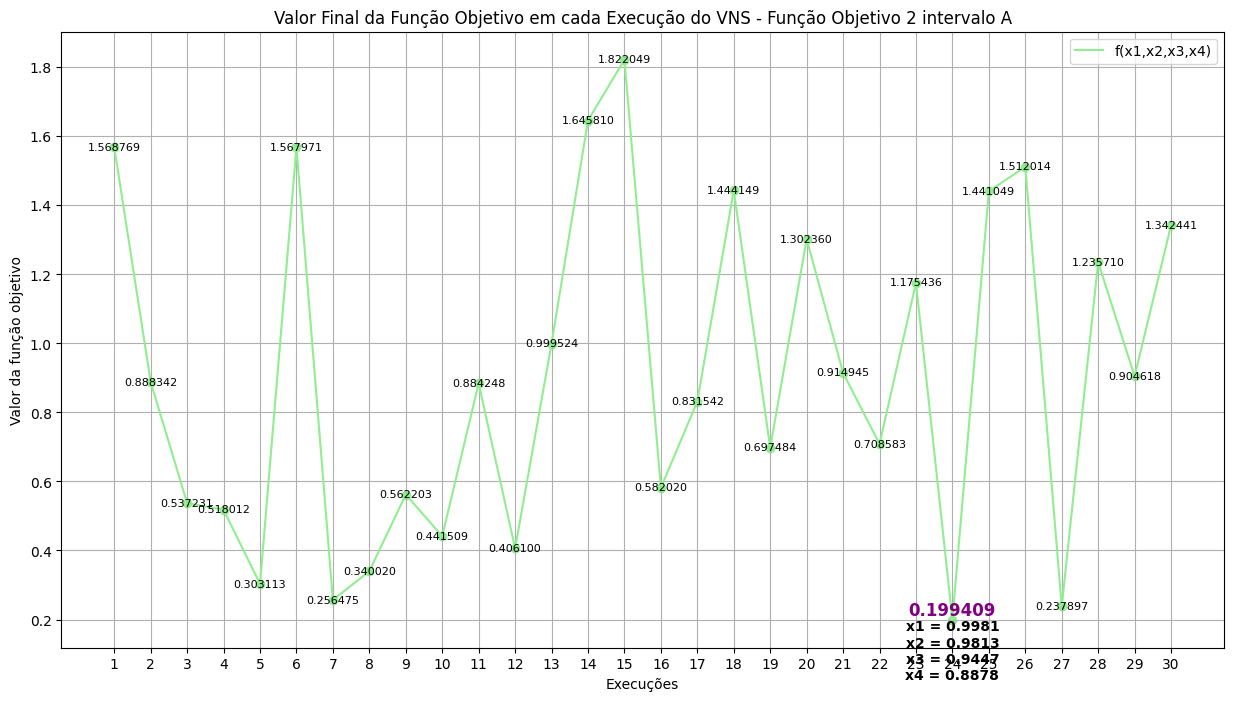

In [111]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo A')


#### Intervalo 2B


In [112]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2b)


{'x1': [np.float64(1.2080167882954125), np.float64(0.800148649126182), np.float64(0.48835737090698605), np.float64(0.9669848935715364), np.float64(1.0596653282928892), np.float64(1.1001897060712837), np.float64(1.1549591764284461), np.float64(0.9877294911710472), np.float64(0.8596120120486043), np.float64(1.0007266100642092), np.float64(0.8679329346067364), np.float64(0.9424095988206524), np.float64(0.888985368153346), np.float64(-0.9335434193031271), np.float64(0.9961482498984315), np.float64(1.0319113331608891), np.float64(1.1275843125103038), np.float64(0.8155237576661297), np.float64(1.0160490770737434), np.float64(0.9664836704943476), np.float64(0.7750622311331832), np.float64(0.8705898836297948), np.float64(1.1120306354192013), np.float64(1.0327735544605738), np.float64(0.876956072047948), np.float64(1.0023785085557453), np.float64(0.7794149334252731), np.float64(1.0068066039586394), np.float64(1.030142823011309), np.float64(1.0395109694749272)], 'x2': [np.float64(1.4150489753291

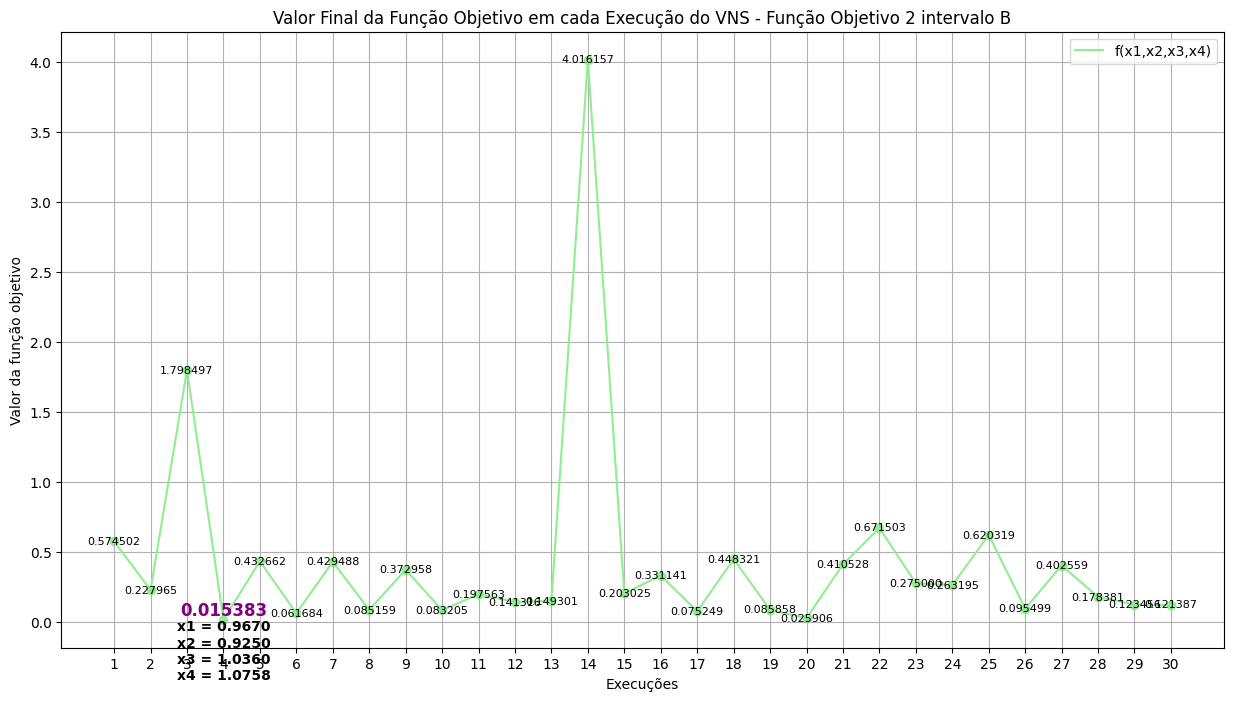

In [113]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo B')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** é inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** → Aceita soluções piores (exploração).

2- **Temperatura baixa** → Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** → Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algorítmo

```python
# 1. INICIALIZAÇÃO
x_atual ← SOLUÇÃO_ALEATÓRIA(limites, dimensao)  # Gera solução inicial
f_atual ← funcao_objetivo(x_atual)
T ← 1000                                        # Temperatura inicial
alpha ← 0.95                                    # Taxa de resfriamento
historico_melhores ← [f_atual]                  # Armazena histórico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FAÇA:
    PARA i DE 1 ATÉ 100 FAÇA:                   # Iterações por temperatura
        
        # 2.1 GERAÇÃO DE VIZINHO
        x_vizinho ← PERTURBA(x_atual, limites)
        f_vizinho ← funcao_objetivo(x_vizinho)
        delta ← f_vizinho - f_atual
        
        # 2.2 CRITÉRIO DE ACEITAÇÃO
        SE delta < 0 OU rand() < exp(-delta/T) ENTÃO:
            x_atual ← x_vizinho                 # Atualiza solução
            f_atual ← f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLUÇÃO
            SE f_atual < MIN(historico_melhores):
                melhor_x ← x_atual
                melhor_f ← f_atual
    
    # 2.4 RESFRIAMENTO
    T ← T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solução final

#### 2.2.3 Implementação em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [114]:
import math

class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padrão
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execução para Todos os Problemas

#### Intervalo 1A

In [115]:
sa_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1a = intervalo1_b[0]
max_1a = intervalo1_b[1]

qtdVariaveisDecisao = 2

# Inicializa a classe SA
sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1a, max_1a], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1a['x1'].append(x[0])
    sa_1a['x2'].append(x[1])
    sa_1a['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1a)

{'x1': [np.float64(0.019132768928423083), np.float64(0.0002561954891380225), np.float64(-0.03752231907397441), np.float64(0.010191162774392915), np.float64(0.009547654618754287), np.float64(0.031446617670614074), np.float64(0.022355766851672065), np.float64(0.0030175563906986724), np.float64(-0.02536457906866918), np.float64(-0.001137228606450158), np.float64(-0.011544940896418332), np.float64(-0.017981855235463584), np.float64(0.016215589506870742), np.float64(0.007357183357143526), np.float64(0.027517384631967623), np.float64(-0.019233234341675676), np.float64(0.0427693531738198), np.float64(-0.044126440750535956), np.float64(0.04491259784701729), np.float64(0.0029452916914713967), np.float64(0.0016465690722888837), np.float64(-0.03380842930771344), np.float64(-0.03016378967841593), np.float64(-0.014754455995634075), np.float64(0.02618854656904368), np.float64(0.02372963022646335), np.float64(0.019773029041272316), np.float64(-0.03564824003689626), np.float64(-0.03039650095182278), n

#### Intervalo 1B

In [116]:
sa_1b = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1b = intervalo1_b[0]
max_1b = intervalo1_b[1]

qtdVariaveisDecisao = 2

sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1b, max_1b], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1b['x1'].append(x[0])
    sa_1b['x2'].append(x[1])
    sa_1b['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1b)

{'x1': [np.float64(-0.016519113507841965), np.float64(0.9331366158025851), np.float64(0.034524727888959994), np.float64(-0.004495006397728041), np.float64(-0.026557061769444168), np.float64(0.011297316990411588), np.float64(0.028250447289334346), np.float64(-0.013852422069577486), np.float64(-0.021533570027322035), np.float64(0.009168255354729204), np.float64(-0.0035879892184311757), np.float64(-0.022347325266099283), np.float64(0.04867152951685849), np.float64(0.04517966666876205), np.float64(-0.05735580264779028), np.float64(-0.05349347546356231), np.float64(-0.015865973243741394), np.float64(-0.9900720062900499), np.float64(0.008029365239438313), np.float64(0.14609310576349888), np.float64(-0.015019547140826539), np.float64(0.03212229007023648), np.float64(-0.9822888200562536), np.float64(0.009514658176814628), np.float64(-0.011962147925938638), np.float64(0.6336315903166936), np.float64(-0.023067635763900363), np.float64(0.006891978684576472), np.float64(-0.04434946784678573), np.f

#### Intervalo 2A

In [117]:
sa_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]
max_2a = intervalo2_a[1]

qtdVariaveisDecisao = 4

sa2 = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2a, max_2a], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2a = sa2.executar(n_execucoes=30)

for x in resultado_sa_2a['melhores_x']:
    sa_2a['x1'].append(x[0])
    sa_2a['x2'].append(x[1])
    sa_2a['x3'].append(x[2])
    sa_2a['x4'].append(x[3])
    sa_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2a")
print(sa_2a)


SA - Resultado 2a
{'x1': [np.float64(1.132639829068785), np.float64(1.3922245682916827), np.float64(1.271037610610132), np.float64(1.1411726115278187), np.float64(0.5901975748197681), np.float64(1.2129586542064645), np.float64(0.9391093030874162), np.float64(0.9688008431982387), np.float64(0.6517681857788347), np.float64(0.3472593337059755), np.float64(1.0069256093633956), np.float64(1.3651237384979793), np.float64(1.1272108009214223), np.float64(1.2643819854117804), np.float64(0.9760164526568249), np.float64(1.113063305369653), np.float64(1.1962147965478138), np.float64(1.1721737600140738), np.float64(1.2715788243926585), np.float64(1.0285892326332249), np.float64(1.1318880189804181), np.float64(1.3789469009584518), np.float64(1.0648184345223348), np.float64(0.4295817691585859), np.float64(0.9231868135046408), np.float64(0.60833891259264), np.float64(0.7037285791097538), np.float64(0.7174971264058381), np.float64(1.3442544989396117), np.float64(0.2322530129940934)], 'x2': [np.float64(

#### Intervalo 2B

In [118]:
sa_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]
max_2b = intervalo2_b[1]

qtdVariaveisDecisao = 4

sa_exec_2b = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2b, max_2b], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2b = sa_exec_2b.executar(n_execucoes=30)

for x in resultado_sa_2b['melhores_x']:
    sa_2b['x1'].append(x[0])
    sa_2b['x2'].append(x[1])
    sa_2b['x3'].append(x[2])
    sa_2b['x4'].append(x[3])
    sa_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2b")
print(sa_2b)

SA - Resultado 2b
{'x1': [np.float64(0.8683122183575003), np.float64(0.9661506746811728), np.float64(1.0013183036737199), np.float64(0.900844905642873), np.float64(0.8750207628479357), np.float64(1.1035580721722966), np.float64(1.083035489789351), np.float64(0.9813364093495525), np.float64(1.1174753295013784), np.float64(1.0130557161492204), np.float64(0.9665800163330353), np.float64(1.0256118481027379), np.float64(0.9274120943158769), np.float64(0.9636244452093888), np.float64(1.1167875877544031), np.float64(0.8941108716208634), np.float64(1.0116079403184193), np.float64(1.12466705647976), np.float64(0.9347121735228722), np.float64(0.9796432772514156), np.float64(0.9311503842221771), np.float64(0.9852481614731072), np.float64(1.0318292350040479), np.float64(1.0139789410922961), np.float64(1.017493524595547), np.float64(0.9159803622975727), np.float64(0.8533988902515939), np.float64(0.9427375865041202), np.float64(0.9736922904855567), np.float64(0.8981203725794483)], 'x2': [np.float64(

#### Função para exibir o boxplot

In [119]:
def exibirBoxplot(resultados_vns, resultados_sa, titulo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=resultados_vns, ax=ax1, color='green')
    sns.boxplot(y=resultados_sa, ax=ax2, color='blue')

    ax1.set_title('VNS', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Função Objetivo', fontsize=10)
    ax2.set_title('SA', fontsize=10, fontweight='bold')

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show() 

#### Função para gerar as estatisticas

In [120]:
def estatisticas(resultadosComparar, nome_funcao_objetivo, nomes_algoritmos):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(nomes_algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # ou x4 se quiser ajustar
    return pd.DataFrame(estatisticas)

Estatísticas Função 1 - Intervalo 1a
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.001552  0.099981  0.045571  0.033277    -0.006641    -0.000789
1        SA  0.001285  0.061505  0.026142  0.018866     0.003018     0.005098 

Estatísticas Função 1 - Intervalo 1b
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.000934  0.034829  0.012549  0.008555     0.001227     0.004637
1        SA  0.001437  0.099878  0.045970  0.032469     0.004146     0.004831 



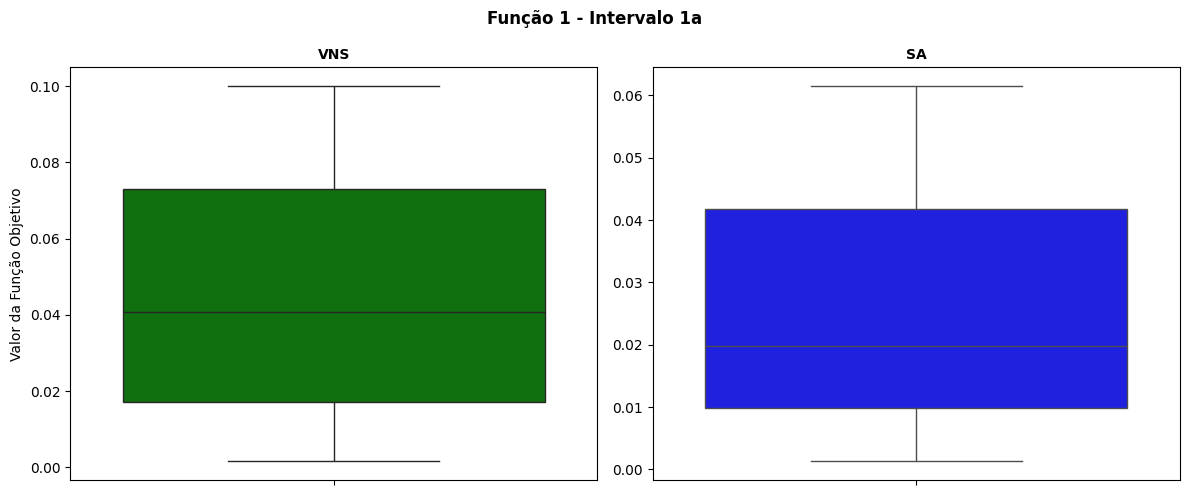

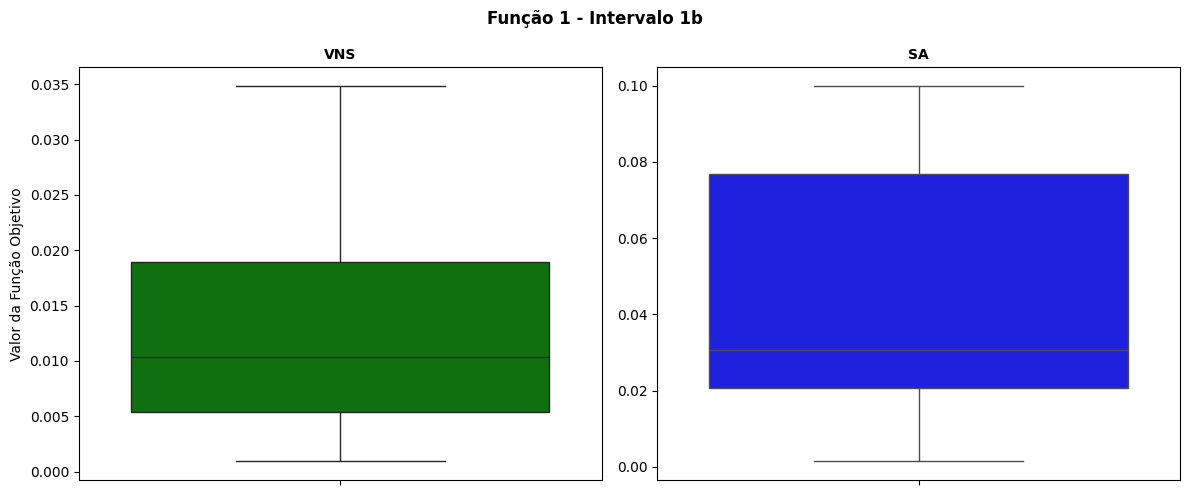

In [121]:
print("Estatísticas Função 1 - Intervalo 1a")
estat_1a = estatisticas([vns_1a, sa_1a], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1a, "\n")

print("Estatísticas Função 1 - Intervalo 1b")
estat_1b = estatisticas([vns_1b, sa_1b], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1b, "\n")

exibirBoxplot(vns_1a['f(x1,x2)'], sa_1a['f(x1,x2)'], 'Função 1 - Intervalo 1a')
exibirBoxplot(vns_1b['f(x1,x2)'], sa_1b['f(x1,x2)'], 'Função 1 - Intervalo 1b')


Estatísticas Função 2 - Intervalo 2a
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.199409  1.822049  0.909034  0.478189     0.998143     0.981345
1        SA  0.666694  2.366049  1.372190  0.509536     1.131888     1.237024 

Estatísticas Função 2 - Intervalo 2b
  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.015383  4.016157  0.430572  0.742570     0.966985     0.924968
1        SA  0.019344  0.165412  0.088182  0.044487     0.985248     0.975605 



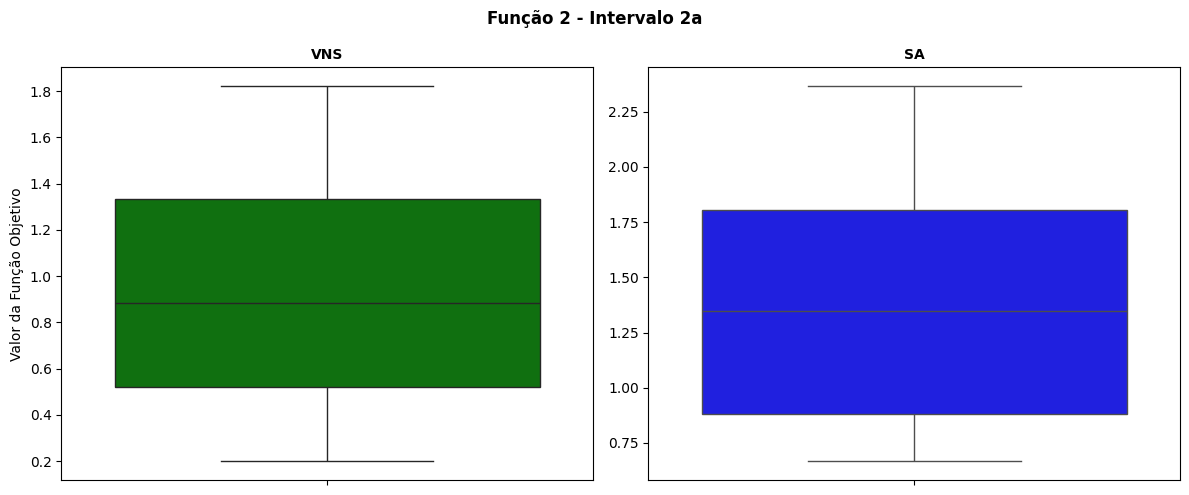

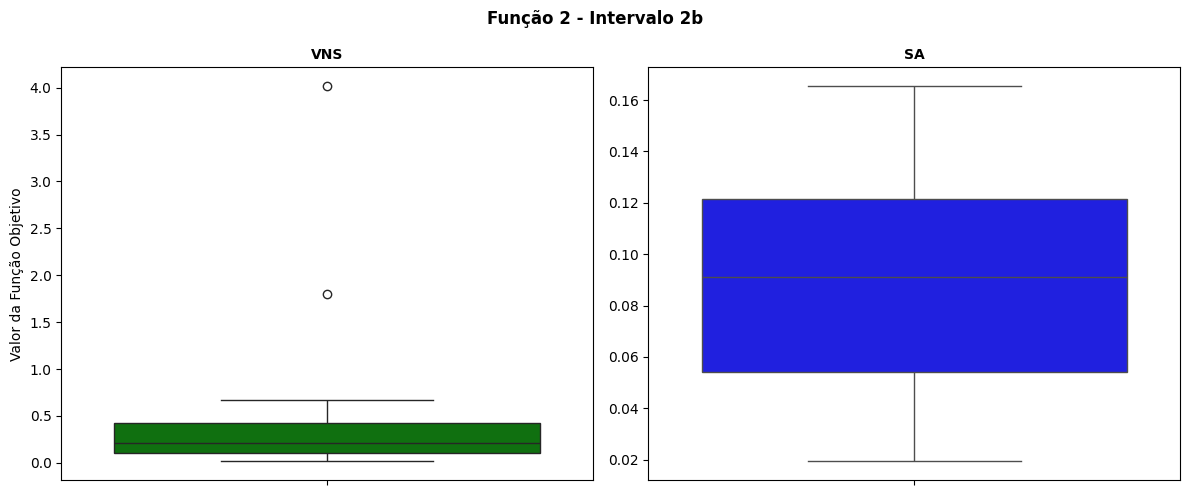

In [122]:
print("Estatísticas Função 2 - Intervalo 2a")
estat_2a = estatisticas([vns_2a, sa_2a], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2a, "\n")

print("Estatísticas Função 2 - Intervalo 2b")
estat_2b = estatisticas([vns_2b, sa_2b], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2b, "\n")

exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], sa_2a['f(x1,x2,x3,x4)'], 'Função 2 - Intervalo 2a')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], sa_2b['f(x1,x2,x3,x4)'], 'Função 2 - Intervalo 2b')